# <center> Dynamic Asset Pricing HW 1</center>

&copy; 2023 Kaiwen Zhou

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

(a) Plot a Brownian path $W$ on $[0, t]$, satisfying: $\tau_{b}<t$ and $W_{t} \leq a$. Plot the corresponding path (i.e. the same ' $\omega$ ') for $\widetilde{W}$ on $[0, t]$.

tau_b is  1.472


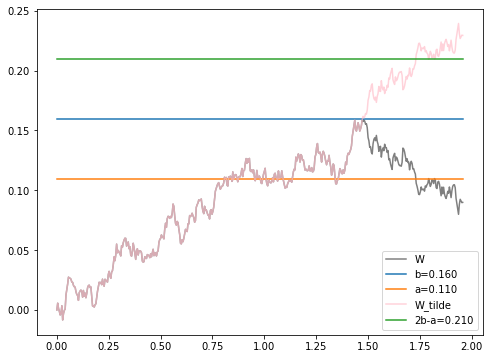

In [70]:
# Set w
np.random.seed(66)

# select time period to be [0, 1.96]
t= 1.96  
delta = 0.004
time = np.arange(0, t, 0.004)

# Construct a Brownian Motion 
W = np.zeros(490)
for i in range(1,490):
    W[i] = W[i-1] + np.random.normal(loc=0, scale=delta)

# Set a and b
b = W[np.argmax(W)]
tau_b= 0 + np.argmax(W)*delta
print('tau_b is ', tau_b)
line_b = np.ones(490)*b

a = b-0.05
line_a = np.ones(490)*a

# Construct the reflecting Brownian Motion 
W_tilde = np.zeros(490)
for i in range(1,490):
    update = W[i] if 0+delta*i < tau_b else 2*b-W[i]
    W_tilde[i] = update

c= 2*b-a
line_c = np.ones(490)*c
fig = plt.figure(figsize=(8,6))
plt.plot(time, W, ms=5, color='black', alpha=0.5, label='W')
plt.plot(time, line_b, label=f'b={b:.3f}')
plt.plot(time, line_a, label=f'a={a:.3f}')
plt.plot(time, W_tilde, ms=5, color='pink', alpha=0.7, label='W_tilde')
plt.plot(time, line_c, label=f'2b-a={c:.3f}')
plt.legend()

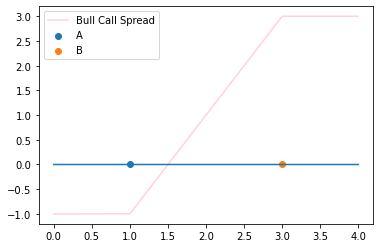

In [81]:
A=1
B=3

def func1(x):
    if x<1:
        return -1
    elif 1<=x<3:
        return 2*x-3
    else:
        return 3
    
s = np.arange(0,4, 0.001)
p = [func1(x) for x in s]
# print(p)
plt.plot(s, p, ms=5, color='pink', alpha=0.7, label='Bull Call Spread')
plt.plot(s,np.zeros(4000))
plt.scatter(1,0, label='A')
plt.scatter(3,0, label='B')
plt.legend()

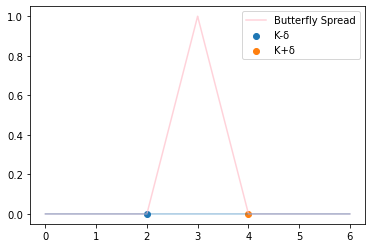

In [87]:
δ=1
K=3

def func2(x):
    if x < K-δ:
        return 0
    elif K-δ<=x<K:
        return (x-(K-δ))/δ
    elif K<=x<K+δ:
        return -(x-(K+δ))/δ
    else:
        return 0
    
s = np.arange(0,6, 0.001)
p = [func2(x) for x in s]
# print(p)
plt.plot(s, p, ms=5, color='pink', alpha=0.7, label='Butterfly Spread')
plt.plot(s,np.zeros(6000), alpha=0.4)
plt.scatter(2,0, label='K-δ')
plt.scatter(4,0, label='K+δ')
plt.legend()